In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t')
df.head(3)

<ipython-input-2-f0b6a3c71669>:4: DtypeWarning: Columns (7,10,12,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file, sep='\t')


,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,7.5,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,7.8,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,7.8,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [222]:
for i in range(len(df)):
    na_jobid = df.loc[i]["na_jobid"]
    if "," in na_jobid:
        print(i, na_jobid)

0 DNA_3228,DNA_3229
1 DNA_3230,DNA_3231
2 DNA_3230,DNA_3231
3 DNA_3230,DNA_4132
4 DNA_3230,DNA_4132
5 DNA_3228,DNA_4131
6 DNA_3228,DNA_3229
7 DNA_3228,DNA_3856
8 DNA_3230,DNA_3231
9 DNA_3228,DNA_3229
10 DNA_3228,DNA_3229
12 DNA_3228,DNA_4131
14 DNA_3228,DNA_4131
15 DNA_3228,DNA_3229
16 DNA_3230,DNA_4132
17 DNA_3230,DNA_4132
18 DNA_3228,DNA_4131
19 DNA_0000,DNA_0001
20 DNA_3230,DNA_3231
21 DNA_3230,DNA_4132
22 DNA_3228,DNA_3229
23 DNA_3230,DNA_3231
24 DNA_3230,DNA_4132
25 DNA_3228,DNA_3229
26 DNA_3228,DNA_3229
27 DNA_3226,DNA_4131
30 DNA_3226,DNA_3227
31 DNA_1092,DNA_0310
33 DNA_3226,DNA_4131
34 DNA_3228,DNA_4131
39 DNA_1092,DNA_0310
40 DNA_3226,DNA_3227
41 DNA_1033,DNA_1034
42 DNA_0004,DNA_0005
48 DNA_3226,DNA_4131
50 DNA_3226,DNA_4131
52 DNA_0944,DNA_0310
54 DNA_3226,DNA_3227
56 DNA_1212,DNA_3223
57 DNA_2482,DNA_2483
61 DNA_1200,DNA_1201
64 DNA_0947,DNA_0310
68 DNA_3234,DNA_3857
69 DNA_3238,DNA_3239
70 DNA_2140,DNA_2141
75 DNA_3230,DNA_4262
77 DNA_3230,DNA_3231
80 DNA_3230,DNA_3231
81

3315 DNA_2540,DNA_2541
3318 DNA_1403,DNA_1404
3319 DNA_3316,DNA_3317
3321 DNA_2081,DNA_4188
3325 DNA_3302,DNA_3303
3328 RNA_000308,RNA_000308
3331 DNA_2619,DNA_2620
3333 DNA_1924,DNA_1925
3334 RNA_000588,RNA_000589
3336 RNA_000801,RNA_000802
3337 DNA_0512,DNA_0833
3342 DNA_3449,DNA_3450
3343 DNA_2283,DNA_2284
3344 DNA_2746,DNA_2747
3348 DNA_1675,DNA_1676
3349 DNA_0097,DNA_0098
3358 DNA_3577,DNA_3578
3360 DNA_2264,DNA_4203
3361 DNA_1132,DNA_4167
3364 DNA_2988,DNA_2989
3365 DNA_2093,DNA_2094
3369 DNA_0519,DNA_1333
3373 DNA_0485,DNA_0771
3374 DNA_0045,DNA_0046
3375 DNA_0479,DNA_1189
3377 DNA_3916,DNA_3917
3391 DNA_2484,DNA_2485
3394 DNA_4275,DNA_4276
3408 DNA_3449,DNA_3450
3415 DNA_1710,DNA_4169
3418 DNA_0909,DNA_0910
3420 DNA_1540,DNA_3962
3421 DNA_2321,DNA_2322
3422 DNA_0533,DNA_0534
3426 RNA_000203,RNA_000203
3427 DNA_2191,DNA_2192
3428 DNA_2229,DNA_2230
3432 DNA_0907,DNA_0908
3435 DNA_0907,DNA_0908
3437 DNA_0907,DNA_0908
3438 RNA_000308,RNA_000308
3440 DNA_2142,DNA_4195
3442 DNA_0907,

6175 DNA_1625,DNA_4054
6179 DNA_2534,DNA_2535
6180 DNA_1737,DNA_1738
6184 DNA_3264,DNA_3265
6187 DNA_1115,DNA_1122
6188 DNA_3507,DNA_3508
6191 DNA_3406,DNA_3407
6193 DNA_2556,DNA_2557
6194 DNA_2395,DNA_2396
6197 DNA_1264,DNA_1265
6199 DNA_2560,DNA_2568
6203 DNA_0834,DNA_0835
6204 DNA_2750,DNA_2751
6205 DNA_3487,DNA_3488
6207 DNA_0679,DNA_0680
6209 DNA_0646,DNA_0645
6210 DNA_2549,DNA_2550
6211 DNA_3398,DNA_3399
6213 DNA_1085,DNA_1086
6223 DNA_2371,DNA_2372
6227 DNA_2397,DNA_2398
6228 DNA_3376,DNA_3377
6229 DNA_1750,DNA_1751
6233 DNA_3346,DNA_3347
6234 DNA_2295,DNA_2296
6235 DNA_2357,DNA_2358
6236 DNA_1008,DNA_1009
6238 DNA_3469,DNA_3470
6241 DNA_2991,DNA_2992
6242 DNA_1266,DNA_1267
6244 DNA_3276,DNA_3277
6247 DNA_0494,DNA_3410
6249 DNA_1008,DNA_1009
6250 DNA_1735,DNA_1736
6251 DNA_2431,DNA_2432
6252 DNA_4255,DNA_4255
6253 DNA_1632,DNA_4063
6254 DNA_0229,DNA_0693
6255 RNA_000345,RNA_000989
6259 DNA_2652,DNA_2653
6262 DNA_2984,DNA_2985
6264 DNA_3394,DNA_3395
6266 DNA_3308,DNA_3309
6267 DN

7909 DNA_2037,DNA_2038
7910 DNA_0911,DNA_0912
7913 DNA_1685,DNA_1686
7914 DNA_1652,DNA_1653
7916 DNA_1652,DNA_1653
7917 DNA_2043,DNA_2044
7919 DNA_1652,DNA_1653
7921 DNA_0911,DNA_0912
7923 DNA_3076,DNA_3077
7925 DNA_2043,DNA_2044
7926 DNA_1652,DNA_1653
7927 DNA_1648,DNA_1660
7929 DNA_1652,DNA_1653
7930 DNA_0269,DNA_0776
7931 DNA_2043,DNA_2044
7932 DNA_1652,DNA_1653
7933 DNA_1652,DNA_1653
7934 DNA_1648,DNA_1660
7936 DNA_2037,DNA_2038
7937 DNA_2824,DNA_2825
7938 DNA_3053,DNA_3054
7940 DNA_1052,DNA_1053
7942 DNA_2043,DNA_2044
7944 DNA_2824,DNA_2825
7945 DNA_2037,DNA_2038
7950 DNA_1334,DNA_1335
7953 DNA_4130,DNA_4130
7955 DNA_0911,DNA_0912
7959 DNA_1652,DNA_1653
7963 DNA_1648,DNA_1660
7965 DNA_3058,DNA_3059
7968 DNA_1648,DNA_1660
7970 DNA_3064,DNA_3065
7971 DNA_2043,DNA_2044
7972 DNA_1652,DNA_1653
7973 DNA_0911,DNA_0912
7974 DNA_1652,DNA_1653
7975 DNA_1334,DNA_1335
7976 DNA_1652,DNA_1653
7978 DNA_1088,DNA_1089
7980 DNA_1652,DNA_1653
7981 DNA_0911,DNA_0912
7982 DNA_2043,DNA_2044
7984 DNA_16

In [220]:
cols = np.array([df.columns]).reshape(-1)
# 7,10,12,34,35,36,37,38,39
for i in [7,10,12,34,35,36,37,38,39]:
    print(cols[i])

Kd
Tm
pmid
align_score
len_nucleotide_sequence_one
len_nucleotide_sequence_two
coverage_nucleotide_sequence_one
coverage_nucleotide_sequence_two
coverage_mean_nucleotide_sequence


In [212]:
data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t', low_memory=False)
df.head(3)

,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [214]:
df100 = df.loc[:100]
type(df100)

pandas.core.frame.DataFrame

In [195]:
complex_str_set = set()
complex_size_by_str = {}
complex_dGs_by_str = {}
complex_map = {}
for i in range(len(df)):
    it = df.loc[i]
    complex_str = it['protein_sequence']+it['nucleotide_sequence']
    
    complex_str_set.add(complex_str)
    if complex_str not in complex_size_by_str:
        complex_size_by_str[complex_str] = 1
    else:
        complex_size_by_str[complex_str] += 1
    if complex_str not in complex_dGs_by_str:
        complex_dGs_by_str[complex_str] = np.array([it['dG']])
    else:
        complex_dGs_by_str[complex_str] = np.concatenate([
            complex_dGs_by_str[complex_str],
            np.array([it['dG']])
        ])
    ####
    if complex_str not in complex_map:
        complex_map[complex_str] = {
            'size' : 1,
            'dG' : np.array([it['dG']]),
            'complex_id' : np.array([it['complex_id']]),
        }
    else:
        complex_map[complex_str]['size'] += 1
        complex_map[complex_str]['dG'] = np.append(complex_map[complex_str]['dG'], it['dG'])
        complex_map[complex_str]['complex_id'] = np.append(complex_map[complex_str]['complex_id'], it['complex_id'])
print(len(complex_str_set))

9093


In [200]:
for k, v in complex_map.items():
    if v['size'] > 1 and v['dG'].var() > 0.01:
        print(v['dG'], v['complex_id'])

[-7.89 -7.1 ] [113 805]
[-7.89 -6.54] [1626 4410]


(array([ 113, 1196]),)


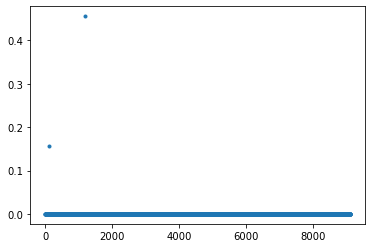

In [189]:
var_per_complex = []
for k, v in complex_dGs_by_str.items():
    var_per_complex.append(v.var())
var_per_complex = np.array(var_per_complex)
bad_complex = np.where(var_per_complex > 0.1)
print(bad_complex)
plt.plot(var_per_complex, '.')
plt.show()

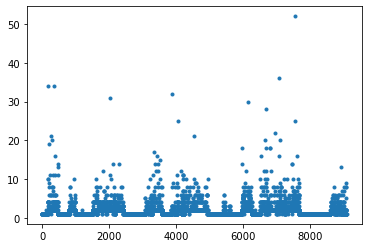

In [178]:
import matplotlib.pyplot as plt
import numpy as np

complex_sizes = []
for k,v in complex_size.items():
    complex_sizes.append(v)
complex_sizes = np.array(complex_sizes)
plt.plot(complex_sizes, '.')
plt.show()

In [181]:
complex_sizes.mean()

1.8982733971186627

In [149]:
# "cluster_protein_na_pair_index" in df.columns
collect = set()
for it in df["cluster_protein_na_pair_index"]:
    collect.add(it)

In [147]:
df["protein_50_na_50_number"]

0        1
1        2
2        2
3        7
4        7
        ..
17256    1
17257    2
17258    2
17259    1
17260    1
Name: protein_50_na_50_number, Length: 17261, dtype: int64

In [142]:
df.columns

Index(['dataset_id', 'UniProt', 'protein_sequence', 'nucleotide_sequence',
       'protein_mutation', 'nucleic_acid_type', 'nucleic_acid_type_new', 'Kd',
       'dG', 'pH', 'Tm', 'Method', 'pmid', 'data_source', 'protein_na_pair',
       'multiple_dg', 'max_min', 'max_min_judge', 'dG_ori', 'pdb_id', 'len_p1',
       'len_p2', 'protein_chain', 'na_chain', 'identity_protein_seq',
       'identity_na_seq', 'UniProt_type', 'protein_sequence_len',
       'wt_af2_file_download', 'mo_pdb_chain', 'bs_score',
       'nucleotide_sequence_one', 'nucleotide_sequence_two',
       'nucleotide_sequence_two_reverse', 'align_score',
       'len_nucleotide_sequence_one', 'len_nucleotide_sequence_two',
       'coverage_nucleotide_sequence_one', 'coverage_nucleotide_sequence_two',
       'coverage_mean_nucleotide_sequence', 'protein_index',
       'cluster_protein_50_index', 'cluster_protein_50_number',
       'cluster_protein_50_member', 'na_index', 'cluster_na_50_index',
       'cluster_na_50_number', '

In [102]:
df2 = df.reset_index()
df2.rename(columns = {'index':'complex_id'}, inplace = True)
# df2.to_csv('../data/_datasets/seq_dg_cluster_final_230607_v2.csv', index=False, sep='\t')
# print(df2['protein_index'])
df2.head(3)


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [221]:
import numpy as np
import pandas as pd
import os

data_dir = '../data/'
data_file = 'train/train.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t')
print(df['protein_index'])
df.head(30)

0       protein_2514
1       protein_2517
2       protein_2512
3       protein_2517
4       protein_2512
            ...     
8079    protein_1321
8080    protein_1197
8081     protein_713
8082     protein_654
8083     protein_654
Name: protein_index, Length: 8084, dtype: object


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,13226,pnat_9833,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,N279A,dsDNA,dsDNA,0.65,-0.980,...,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2514_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_9833_NONE_protein_2514,Rattus norvegicus,"DNA_3228,DNA_3229"
1,13267,pnat_12328,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|TGAGTTGGTTGGACGGCTGC...,N279Q,dsDNA,dsDNA,0.041,-0.990,...,"Cluster_622,Cluster_623",1,dsDNA1258,protein_2517_dsDNA1258,"protein_1324_dsDNA1258,protein_2511_dsDNA1258,...",8,cluster_pair_3746,pnat_12328_NONE_protein_2517,Rattus norvegicus,"DNA_3230,DNA_3231"
2,13216,pnat_4021,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|TGAGTTGGTTGGACGGCTGC...,Y271F,dsDNA,dsDNA,0.041,-0.990,...,"Cluster_622,Cluster_623",1,dsDNA1258,protein_2512_dsDNA1258,"protein_1324_dsDNA1258,protein_2511_dsDNA1258,...",8,cluster_pair_3746,pnat_4021_NONE_protein_2512,Rattus norvegicus,"DNA_3230,DNA_3231"
3,14485,pronab_6499,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|GGACGGCATTGGATCGAGGA...,N279Q,DNA,dsDNA,0.61,-0.300,...,"Cluster_622,Cluster_652",4,"dsDNA1673,dsDNA1792,dsDNA1793,dsDNA1794",protein_2517_dsDNA1673,"protein_1324_dsDNA1673,protein_1324_dsDNA1792,...",13,cluster_pair_4216,pronab_6499_NONE_protein_2517,Rattus norvegicus,"DNA_3230,DNA_4132"
4,16375,pronab_6573,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|GGACGGCATTGGATCGAGGA...,Y271F,DNA,dsDNA,0.95,-1.005,...,"Cluster_622,Cluster_652",4,"dsDNA1673,dsDNA1792,dsDNA1793,dsDNA1794",protein_2512_dsDNA1673,"protein_1324_dsDNA1673,protein_1324_dsDNA1792,...",13,cluster_pair_4216,pronab_6573_NONE_protein_2512,Rattus norvegicus,"DNA_3230,DNA_4132"
5,16409,pronab_6588,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GGACGGCATTGGATCGAGGT...,wild,DNA,dsDNA,0.066,-0.970,...,"Cluster_620,Cluster_651",1,dsDNA1672,protein_1324_dsDNA1672,"protein_1324_dsDNA1672,protein_2511_dsDNA1672,...",6,cluster_pair_4215,pronab_6588_NONE_protein_1324,Rattus norvegicus,"DNA_3228,DNA_4131"
6,13244,pnat_9698,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,wild,dsDNA,dsDNA,0.65,-0.980,...,"Cluster_620,Cluster_621",1,dsDNA1257,protein_1324_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_9698_NONE_protein_1324,Rattus norvegicus,"DNA_3228,DNA_3229"
7,14108,pronab_6481,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GGACGGCATTGGATCGACCA...,wild,DNA,dsDNA,0.2,-0.990,...,"Cluster_2456,Cluster_620",1,dsDNA1470,protein_1324_dsDNA1470,"protein_1324_dsDNA1470,protein_2511_dsDNA1470,...",4,cluster_pair_3964,pronab_6481_NONE_protein_1324,Rattus norvegicus,"DNA_3228,DNA_3856"
8,13208,pnat_1946,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|TGAGTTGGTTGGACGGCTGC...,Y271A,dsDNA,dsDNA,0.041,-0.990,...,"Cluster_622,Cluster_623",1,dsDNA1258,protein_2511_dsDNA1258,"protein_1324_dsDNA1258,protein_2511_dsDNA1258,...",8,cluster_pair_3746,pnat_1946_NONE_protein_2511,Rattus norvegicus,"DNA_3230,DNA_3231"
9,13263,pnat_1600,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,N279Q,dsDNA,dsDNA,0.65,-0.980,...,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2517_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_1600_NONE_protein_2517,Rattus norvegicus,"DNA_3228,DNA_32

In [ ]:
# 请按照数据集中的protein_index列，在相应文件夹中找到pssm_hmm.txt文件，该文件是特征文件;
#  pssm_hmm.txt 文件含有 HMMblit 和 PSI-Blast 计算的蛋白序列中每个残基的保守性，共有73列信息，第一列为 蛋白序列信息；
# hmm 为前缀的为 HMMblit 计算的保守性；
# pssm 为前缀的为 PSI-Blast 计算的保守性；
# psfm为前缀的列以及se,eco,jsd为 pssm 特征的衍生特征;%   

In [201]:
pwm_dir = '../data/pwm_data/pwm'
prot_dir = 'protein_0'
data_file = os.path.join(pwm_dir, prot_dir, "pssm_hmm.txt")
pwm_df = pd.read_csv(data_file, sep='\t')
print(pwm_df.columns)
pwm_df.tail(3)

Index(['seq', 'hmm_A', 'hmm_C', 'hmm_D', 'hmm_E', 'hmm_F', 'hmm_G', 'hmm_H',
       'hmm_I', 'hmm_K', 'hmm_L', 'hmm_M', 'hmm_N', 'hmm_P', 'hmm_Q', 'hmm_R',
       'hmm_S', 'hmm_T', 'hmm_V', 'hmm_W', 'hmm_Y', 'hmm_M->M', 'hmm_M->I',
       'hmm_M->D', 'hmm_I->M', 'hmm_I->I', 'hmm_D->M', 'hmm_D->D', 'hmm_Neff',
       'hmm_Neff_I', 'hmm_Neff_D', 'pssm_A', 'pssm_R', 'pssm_N', 'pssm_D',
       'pssm_C', 'pssm_Q', 'pssm_E', 'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L',
       'pssm_K', 'pssm_M', 'pssm_F', 'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W',
       'pssm_Y', 'pssm_V', 'psfm_A', 'psfm_R', 'psfm_N', 'psfm_D', 'psfm_C',
       'psfm_Q', 'psfm_E', 'psfm_G', 'psfm_H', 'psfm_I', 'psfm_L', 'psfm_K',
       'psfm_M', 'psfm_F', 'psfm_P', 'psfm_S', 'psfm_T', 'psfm_W', 'psfm_Y',
       'psfm_V', 'se', 'eco', 'jsd'],
      dtype='object')


,seq,hmm_A,hmm_C,hmm_D,hmm_E,hmm_F,hmm_G,hmm_H,hmm_I,hmm_K,...,psfm_F,psfm_P,psfm_S,psfm_T,psfm_W,psfm_Y,psfm_V,se,eco,jsd
540,E,0.9999,0.9999,0.9999,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,...,0,0,0,0,0,0,0,532.158149,1.5135,49.517135
541,I,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.0000,0.9999,...,0,0,0,0,0,0,2,616.896657,1.6001,49.511069
542,C,0.9999,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0,0,0,0,0,0,0,664.385619,1.5525,50.339389


In [163]:
hmm_cols = pwm_df.columns[pwm_df.columns.str.startswith("hmm")]
print(hmm_cols)
print(len(hmm_cols))
pwm_df.iloc[:, 1:1+30].head(3)

Index(['hmm_A', 'hmm_C', 'hmm_D', 'hmm_E', 'hmm_F', 'hmm_G', 'hmm_H', 'hmm_I',
       'hmm_K', 'hmm_L', 'hmm_M', 'hmm_N', 'hmm_P', 'hmm_Q', 'hmm_R', 'hmm_S',
       'hmm_T', 'hmm_V', 'hmm_W', 'hmm_Y', 'hmm_M->M', 'hmm_M->I', 'hmm_M->D',
       'hmm_I->M', 'hmm_I->I', 'hmm_D->M', 'hmm_D->D', 'hmm_Neff',
       'hmm_Neff_I', 'hmm_Neff_D'],
      dtype='object')
30


,hmm_A,hmm_C,hmm_D,hmm_E,hmm_F,hmm_G,hmm_H,hmm_I,hmm_K,hmm_L,...,hmm_M->M,hmm_M->I,hmm_M->D,hmm_I->M,hmm_I->I,hmm_D->M,hmm_D->D,hmm_Neff,hmm_Neff_I,hmm_Neff_D
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.1315,0.0,0.0
1,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.1315,0.0,0.0
2,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.1315,0.0,0.0


In [168]:
pssm_cols = pwm_df.columns[pwm_df.columns.str.startswith("pssm")]
print(pssm_cols)
print(len(pssm_cols))
# 1+len(hmm_cols) ~ 1+len(hmm_cols)+len(psfm_cols)
ibeg = 1+len(hmm_cols)
iend = 1+len(hmm_cols)+len(pssm_cols)
pwm_df.iloc[:, ibeg:iend].head(3)

Index(['pssm_A', 'pssm_R', 'pssm_N', 'pssm_D', 'pssm_C', 'pssm_Q', 'pssm_E',
       'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L', 'pssm_K', 'pssm_M', 'pssm_F',
       'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W', 'pssm_Y', 'pssm_V'],
      dtype='object')
20


,pssm_A,pssm_R,pssm_N,pssm_D,pssm_C,pssm_Q,pssm_E,pssm_G,pssm_H,pssm_I,pssm_L,pssm_K,pssm_M,pssm_F,pssm_P,pssm_S,pssm_T,pssm_W,pssm_Y,pssm_V
0,0.047426,0.047426,0.017986,0.006693,0.047426,0.119203,0.017986,0.006693,0.017986,0.268941,0.500000,0.047426,0.999955,0.119203,0.006693,0.047426,0.047426,0.047426,0.047426,0.268941
1,0.997527,0.047426,0.047426,0.047426,0.268941,0.119203,0.119203,0.268941,0.047426,0.047426,0.047426,0.119203,0.119203,0.017986,0.119203,0.500000,0.268941,0.017986,0.047426,0.119203
2,0.997527,0.047426,0.047426,0.047426,0.952574,0.119203,0.119203,0.268941,0.047426,0.047426,0.047426,0.119203,0.119203,0.017986,0.119203,0.500000,0.268941,0.017986,0.047426,0.268941


In [169]:
psfm_cols = pwm_df.columns[pwm_df.columns.str.startswith("psfm")]
print(psfm_cols)
print(len(psfm_cols))
# 1+len(hmm_cols) ~ 1+len(hmm_cols)+len(psfm_cols)
ibeg = 1+len(hmm_cols)+len(pssm_cols)
iend = 1+len(hmm_cols)+len(pssm_cols)+len(psfm_cols)
pwm_df.iloc[:, ibeg:iend].head(3)

Index(['psfm_A', 'psfm_R', 'psfm_N', 'psfm_D', 'psfm_C', 'psfm_Q', 'psfm_E',
       'psfm_G', 'psfm_H', 'psfm_I', 'psfm_L', 'psfm_K', 'psfm_M', 'psfm_F',
       'psfm_P', 'psfm_S', 'psfm_T', 'psfm_W', 'psfm_Y', 'psfm_V'],
      dtype='object')
20


,psfm_A,psfm_R,psfm_N,psfm_D,psfm_C,psfm_Q,psfm_E,psfm_G,psfm_H,psfm_I,psfm_L,psfm_K,psfm_M,psfm_F,psfm_P,psfm_S,psfm_T,psfm_W,psfm_Y,psfm_V
0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0
1,97,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
2,92,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [136]:
xx = pwm_df.iloc[:, 1:1+30].values
# xx = xx.values
xx.shape

(543, 30)

In [139]:
y = np.concatenate([xx, xx], axis=-1)
y.shape

(543, 60)

In [3]:
set_uni_prot = set()
for i in range(len(df)):
    up_id = df.loc[i]['UniProt']
    set_uni_prot.add(up_id)
print(len(set_uni_prot))

781


In [4]:
n = len(df)
ss = set()
for i in range(n):
    rdna_seq = df.loc[i]['nucleotide_sequence']
    for it in rdna_seq:
        ss.add(it)
ss

{'A', 'C', 'G', 'T', 'U', '|'}

In [5]:
n = len(df)
ss = set()
n_double_seq = 0
n_single_seq = 0
for i in range(n):
    rdna_seq = df.loc[i]['nucleotide_sequence']
    if '|' in rdna_seq:
        n_double_seq+=1
    else:
        n_single_seq+=1
n_double_seq, n_single_seq

(7095, 10166)

In [6]:
def binarize_categorical(matrix, n_classes, out=None):
    L = matrix.shape[0]
    matrix = matrix.astype(np.int32)
    if out is None:
        out = np.zeros([L, n_classes], dtype=np.bool_)
    subset = (matrix>=0) & (matrix<n_classes)
    out[np.arange(L)[subset],matrix[subset]] = 1
    return out

In [7]:
rdna_seq = df.loc[0]['nucleotide_sequence']


rdna_map = {'A':0, 'T':1, 'C':2, 'G':3, 'U':3}
rdna_seqs = None
if '|' in rdna_seq:
    rdna_seqs = rdna_seq.split('|')
else:
    rdna_seqs = [rdna_seq]

rdna_attributes = list()
for seq in rdna_seqs:
    seq_int = [rdna_map[x] for x in seq]
    seq_int = np.array(seq_int)
    seq_mat = binarize_categorical(seq_int, 4).astype(np.float32)
    print(seq_mat.shape)
    rdna_attributes.append(seq_mat)
np.concatenate(rdna_attributes).shape

(9, 4)
(9, 4)


(18, 4)

In [59]:
import pandas as pd
import numpy as np
import os

data_dir = '../data/_datasets/'
data_file = 'table_hox_zscore_102107.txt'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t')
df.head(3)

,8mer,8mer.1,Alx3_3418.2,Alx4_1744.1,Arx_1738.2,Bapx1_2343.1,Barhl1_2590.2,Barhl2_3868.1,Barx1_2877.1,Barx2_3447.2,...,Tcf1_2666.2,Tcf2_0913.2,Tgif1_2342.2,Tgif2_3451.1,Titf1_1722.2,Tlx2_3498.2,Uncx4.1_2281.2,Vax1_3499.1,Vax2_3500.1,Vsx1_1728.1
0,AAAAAAAA,TTTTTTTT,2.3401,1.7044,2.5305,0.7962,1.8823,3.2222,1.2282,2.0546,...,1.4632,-0.0636,1.2235,0.0742,2.0043,0.5475,1.3708,1.6994,2.2566,3.3771
1,AAAAAAAC,GTTTTTTT,1.3416,1.4467,0.9565,0.0567,1.8291,2.4403,0.9911,1.2143,...,1.1287,1.0444,-0.2575,0.9416,0.3597,-0.2338,0.9116,1.2902,0.9958,1.2923
2,AAAAAAAG,CTTTTTTT,1.3386,1.0929,1.4749,1.1892,1.0593,1.4076,0.3329,1.2362,...,0.5170,0.4963,0.3452,0.2785,2.1461,-0.3770,0.3261,1.0687,0.3439,2.3979


In [60]:
prots = [x for x in df.keys()][2:]
prots = [x.split('_')[0] for x in prots]
print("all cols: ", prots)

all cols:  ['Alx3', 'Alx4', 'Arx', 'Bapx1', 'Barhl1', 'Barhl2', 'Barx1', 'Barx2', 'Bsx', 'Cart1', 'Cart1', 'Cdx1', 'Cdx2', 'Cphx', 'Crx', 'Cutl1', 'Cutl1', 'Dbx1', 'Dbx2', 'Dlx1', 'Dlx2', 'Dlx3', 'Dlx4', 'Dlx5', 'Dmbx1', 'Dobox4', 'Dobox5', 'Duxl', 'Emx2', 'En1', 'En2', 'Esx1', 'Evx1', 'Evx2', 'Gbx1', 'Gbx2', 'Gsc', 'Gsh2', 'Hdx', 'Hlx1', 'Hlxb9', 'Hmbox1', 'Hmx1', 'Hmx2', 'Hmx3', 'Homez', 'Hoxa1', 'Hoxa10', 'Hoxa11', 'Hoxa13', 'Hoxa2', 'Hoxa3', 'Hoxa4', 'Hoxa5', 'Hoxa6', 'Hoxa7', 'Hoxa7', 'Hoxa9', 'Hoxb13', 'Hoxb3', 'Hoxb4', 'Hoxb5', 'Hoxb6', 'Hoxb7', 'Hoxb8', 'Hoxb9', 'Hoxc10', 'Hoxc11', 'Hoxc12', 'Hoxc13', 'Hoxc4', 'Hoxc5', 'Hoxc6', 'Hoxc8', 'Hoxc9', 'Hoxd1', 'Hoxd10', 'Hoxd11', 'Hoxd12', 'Hoxd13', 'Hoxd3', 'Hoxd8', 'Ipf1', 'Irx2', 'Irx3', 'Irx3', 'Irx4', 'Irx5', 'Irx6', 'Isl2', 'Isx', 'Lbx2', 'Lhx1', 'Lhx2', 'Lhx3', 'Lhx4', 'Lhx5', 'Lhx6', 'Lhx6', 'Lhx8', 'Lhx9', 'Lmx1a', 'Lmx1b', 'Meis1', 'Meox1', 'Mrg1', 'Mrg2', 'Msx1', 'Msx2', 'Msx3', 'Nkx1-1', 'Nkx1-2', 'Nkx2-2', 'Nkx2-3', 'Nkx

In [41]:
for k in map2seq.keys():
    if k not in prots:
        print(k)
print('---')
print(len(prots))
for k in prots:
    if k not in map2seq.keys():
        print(k)

---
178
Duxl


In [61]:
data_file = 'homeodomains_mouse.fa'
data_file = os.path.join(data_dir, data_file)
f = open(data_file, 'r')
Lines = f.readlines()

prot2seq = dict()
key_name = None
for line in Lines:
    if line[0] == '>':
        key_name = line[1:].replace('\n', '')
    else:
        if key_name is not None and key_name in prots:
            prot2seq[key_name] = line.replace('\n', '')
        key_name = None
map2seq = {x:prot2seq[x] for x in prots if x in prot2seq.keys()}

In [62]:
prot_keys = [x for x in df.keys()][2:]
train_mapping = {
    'protein_sequence' : [],
    'nucleotide_sequence' : [],
    'zscore' : [],
}
val_mapping = {
    'protein_sequence' : [],
    'nucleotide_sequence' : [],
    'zscore' : [],
}

training_prot_size = int(177 / 2)

for i in tqdm(range(len(df))):
    local_id = 0
    # items = [df.loc[i][k] for k in prot_keys if k.split('_')[0] in map2seq.keys()]
    for k in prot_keys:
        orig_k = k
        k = k.split('_')[0]
        if k in map2seq.keys():
            prot_seq = map2seq[k]
            n_seq = df.loc[i]['8mer'] + '|' + df.loc[i]['8mer.1']
            z = df.loc[i][orig_k]
            if local_id > training_prot_size:
                val_mapping['protein_sequence'].append(prot_seq)
                val_mapping['nucleotide_sequence'].append(n_seq)
                val_mapping['zscore'].append(z)                
            else:
                train_mapping['protein_sequence'].append(prot_seq)
                train_mapping['nucleotide_sequence'].append(n_seq)
                train_mapping['zscore'].append(z)
            
            local_id += 1
            
out_df = pd.DataFrame(train_mapping)
out_df.to_csv('../data/hox_zscore_train.csv', index=False, sep='\t')
out_df2 = pd.DataFrame(val_mapping)
out_df2.to_csv('../data/hox_zscore_val.csv', index=False, sep='\t')

 27%|██▋       | 8790/32896 [04:30<12:22, 32.48it/s]


KeyboardInterrupt: 

In [67]:
len(mapping['protein_sequence'])

5822592

In [12]:
# homeodomains_mouse table_hox_zscore_102107
out_df.to_csv('../data/_datasets/combined_data_homeodomains_mouse_and_hox_zscore_102107.csv', index=False, sep='\t')

In [42]:
32896 177  5822592

5822592

In [51]:
177/2

88.5

In [69]:


training_prot_size = int(177 / 2)

list_prot = mapping['protein_sequence']
list_nc   = mapping['nucleotide_sequence']
list_zscore = mapping['zscore']

train_list_prot = []
train_list_nc = []
train_list_zscore = []

val_list_prot = []
val_list_nc = []
val_list_zscore = []

local_id = 0
for i in tqdm(range(len(list_prot))):
    if i % 177 == 0: # first
        local_id =0
    
    if local_id > training_prot_size:
        val_list_prot.append(list_prot[i])
        val_list_nc.append(list_nc[i])
        val_list_zscore.append(list_zscore[i])
    else:
        train_list_prot.append(list_prot[i])
        train_list_nc.append(list_nc[i])
        train_list_zscore.append(list_zscore[i])    
    
    
    local_id += 1

train_mapping = {
    'protein_sequence' : train_list_prot,
    'nucleotide_sequence' : train_list_nc,
    'zscore' : train_list_zscore,
}
val_mapping = {
    'protein_sequence' : val_list_prot,
    'nucleotide_sequence' : val_list_nc,
    'zscore' : val_list_zscore,
}

out_df = pd.DataFrame(train_mapping)
out_df.to_csv('../data/hox_zscore_train.csv', index=False, sep='\t')
out_df2 = pd.DataFrame(val_mapping)
out_df2.to_csv('../data/hox_zscore_val.csv', index=False, sep='\t')

100%|██████████| 5822592/5822592 [00:01<00:00, 4568124.87it/s]


In [71]:
train_mapping = {
    'protein_sequence' : train_list_prot,
    'nucleotide_sequence' : train_list_nc,
    'zscore' : train_list_zscore,
}
val_mapping = {
    'protein_sequence' : val_list_prot,
    'nucleotide_sequence' : val_list_nc,
    'zscore' : val_list_zscore,
}

out_df = pd.DataFrame(train_mapping)
out_df.to_csv('../data/hox_zscore_train.csv', index=False, sep='\t')
out_df2 = pd.DataFrame(val_mapping)
out_df2.to_csv('../data/hox_zscore_val.csv', index=False, sep='\t')

In [39]:

data_file = '../data/hox_zscore.csv'

df = pd.read_csv(data_file, sep='\t')
df.head(13)

,protein_sequence,nucleotide_sequence,zscore
0,RRNRTTFSTFQLEELEKVFQKTHYPDVYAREQLALRTDLTEARVQV...,AAAAAAAA|TTTTTTTT,2.3401
1,RRNRTTFTSYQLEELEKVFQKTHYPDVYAREQLAMRTDLTEARVQV...,AAAAAAAA|TTTTTTTT,1.7044
2,RRYRTTFTSYQLEELERAFQKTHYPDVFTREELAMRLDLTEARVQV...,AAAAAAAA|TTTTTTTT,2.5305
3,KRSRAAFSHAQVFELERRFNHQRYLSGPERADLAASLKLTETQVKI...,AAAAAAAA|TTTTTTTT,0.7962
4,RKARTAFTDHQLAQLERSFERQKYLSVQDRMELAASLNLTDTQVKT...,AAAAAAAA|TTTTTTTT,1.8823
5,RKARTAFSDHQLNQLERSFERQKYLSVQDRMDLAAALNLTDTQVKT...,AAAAAAAA|TTTTTTTT,3.2222
6,RRSRTVFTELQLMGLEKRFEKQKYLSTPDRIDLAESLGLSQLQVKT...,AAAAAAAA|TTTTTTTT,1.2282
7,RRSRTIFTELQLMGLEKKFQKQKYLSTPDRLDLAQSLGLTQLQVKT...,AAAAAAAA|TTTTTTTT,2.0546
8,RKARTVFSDSQLSGLEKRFEIQRYLSTPERVELATALSLSETQVKT...,AAAAAAAA|TTTTTTTT,0.5882
9,RRHRTTFTSLQLEELEKVFQKTHYPDVYVREQLALRTELTEARVQV...,AAAAAAAA|TTTTTTTT,2.2736


In [4]:
list_aa = [
    'A',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'K',
    'L',
    'M',
    'N',
    'P',
    'Q',
    'R',
    'S',
    'T',
    'V',
    'W',
    'Y'
]
list_nc = ['A', 'T', 'C', 'G', 'U']

In [3]:

data_file = '../data/hox_data/train/hox_zscore_train.csv'

df = pd.read_csv(data_file, sep='\t')
df.head(13)

,protein_sequence,nucleotide_sequence,zscore
0,RRNRTTFSTFQLEELEKVFQKTHYPDVYAREQLALRTDLTEARVQV...,AAAAAAAA|TTTTTTTT,2.3401
1,RRNRTTFTSYQLEELEKVFQKTHYPDVYAREQLAMRTDLTEARVQV...,AAAAAAAA|TTTTTTTT,1.7044
2,RRYRTTFTSYQLEELERAFQKTHYPDVFTREELAMRLDLTEARVQV...,AAAAAAAA|TTTTTTTT,2.5305
3,KRSRAAFSHAQVFELERRFNHQRYLSGPERADLAASLKLTETQVKI...,AAAAAAAA|TTTTTTTT,0.7962
4,RKARTAFTDHQLAQLERSFERQKYLSVQDRMELAASLNLTDTQVKT...,AAAAAAAA|TTTTTTTT,1.8823
5,RKARTAFSDHQLNQLERSFERQKYLSVQDRMDLAAALNLTDTQVKT...,AAAAAAAA|TTTTTTTT,3.2222
6,RRSRTVFTELQLMGLEKRFEKQKYLSTPDRIDLAESLGLSQLQVKT...,AAAAAAAA|TTTTTTTT,1.2282
7,RRSRTIFTELQLMGLEKKFQKQKYLSTPDRLDLAQSLGLTQLQVKT...,AAAAAAAA|TTTTTTTT,2.0546
8,RKARTVFSDSQLSGLEKRFEIQRYLSTPERVELATALSLSETQVKT...,AAAAAAAA|TTTTTTTT,0.5882
9,RRHRTTFTSLQLEELEKVFQKTHYPDVYVREQLALRTELTEARVQV...,AAAAAAAA|TTTTTTTT,2.2736


In [8]:
for i in tqdm(range(len(df))):
    it = df.loc[i]
#     prot_seq = it['protein_sequence']
#     nc_seq = it['nucleotide_sequence'].replace('|', '')
    zsc = it['zscore']
#     bad_aaseq = len([x for x in prot_seq if x not in list_aa])
#     bad_ncseq = len([x for x in nc_seq if x not in list_nc])
#     if bad_aaseq > 0 or bad_ncseq > 0:
#         print(i)
    if np.isnan(zsc):
        print(i)

100%|██████████| 2927744/2927744 [01:22<00:00, 35681.65it/s]


In [38]:
pred = {
    'pred_class' : 2,
    'traj_pred' : 2,
    'env_update' : 5,
    'mode_update' : 5,
    'map_assoc_update' : 2,
    'overlap' : 5,
}
beh = {
    'algo' : 5,
    'beh_env' : 3,
    'heuristic' : 8,
    'beh_cost' : 8,
    'gaps' : 5,
    'state_mechine' : 5,
}
traj = {
    'agent_traj_api' : 3,
    'sample' : 5,
    'unit_test' : 3,
}
arch = {
    'shared_mem' : 3,
}

t_pred = np.sum(np.array([v for k, v in pred.items()]))
t_beh = np.sum(np.array([v for k, v in beh.items()]))
t_traj = np.sum(np.array([v for k, v in traj.items()]))
t_arch = np.sum(np.array([v for k, v in arch.items()]))
print(t_pred, t_beh, t_traj, t_arch)
t_all = np.sum((t_pred, t_beh, t_traj, t_arch))
print(t_all)
t_avg = (t_pred + t_beh) / 4.0 + t_traj + t_arch
print(t_avg)

21 34 11 3
69
27.75


In [24]:
realxs = []
lengths = []
for i in range(5):
    n = int(np.random.randint(1,5,1))
    lengths.append(n)
    realxs.append(torch.rand(n, 1))
print(lengths)
xs = torch.zeros([5, max(lengths), 1])
for i in range(5):
    xs[i, :lengths[i]] = realxs[i]
print(xs)

[4, 3, 3, 2, 2]
tensor([[[0.2560],
         [0.8598],
         [0.7426],
         [0.8581]],

        [[0.1366],
         [0.0197],
         [0.2883],
         [0.0000]],

        [[0.6550],
         [0.7638],
         [0.4770],
         [0.0000]],

        [[0.9065],
         [0.1073],
         [0.0000],
         [0.0000]],

        [[0.5173],
         [0.7174],
         [0.0000],
         [0.0000]]])


In [29]:
from modeling.lib import MLP
fc = MLP(1, 6)
ys = fc(xs)
print(ys.shape, ys)

ModuleNotFoundError: No module named 'modeling'